# Challenge: Analyzing Text about Data Science


# Goal

###### As a text, I will use the page on Data Science from Wikipedia:

In [1]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

# Step 1: Getting the Data
###### First step in every data science process is getting the data. We will use requests library to do that:

In [4]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Machine learning - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature

# Step 2 Transforming the Data

###### The next step is to convert the data into the form suitable for processing

In [8]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script", "style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script", "style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data) == "" or self.script:
            return
        self.res += ' ' + data.replace('[edit]', '')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us Donate 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Search Search Appearance Create account Log in Personal tools Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 History 2 Relationships to other fields Toggle Relationships to other fields subsection 2.1 Artificial intelligence 2.2 Data compression 2.3 Data mining 2.4 Generalization 2.5 Statistics 2.6 Statistical physics 3 Theory 4 Approaches Toggle Approaches subsection 4.1 Supervised learning 4.2 Unsupervised learning 4.3 Semi-supervised learning 4.4 Reinforcement learning 4.5 Dimensionality reduction 4.6 Other types 4.6.1 Self-learning 4.6.2 Feature learning 4.6.3 Sparse dictionary learning 4.6.4 Anomaly detection 4.6.5 Robot learning 4.6.6 Associatio

# Step 3 Getting Insights

###### The most important step is to turn our data into some for from which we can draw insights

In [9]:
import sys
!{sys.executable} -m pip install nlp_rake

     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     - ----------------------------------- 30.7/981.5 kB 435.7 kB/s eta 0:00:03
     -- ---------------------------------- 61.4/981.5 kB 656.4 kB/s eta 0:00:02
     --- -------------------------------- 102.4/981.5 kB 653.6 kB/s eta 0:00:02
     ----- ------------------------------ 153.6/981.5 kB 833.5 kB/s eta 0:00:01
     ------- ---------------------------- 204.8/981.5 kB 778.2 kB/s eta 0:00:01
     --------- -------------------------- 256.0/981.5 kB 827.5 kB/s eta 0:00:01
     ----------- ------------------------ 307.2/981.5 kB 863.3 kB/s eta 0:00:01
     ------------ ----------------------- 348.2/981.5 kB 830.3 kB/s eta 0:00:01
     -------------- --------------------- 389.1/981.5 kB 897.8 kB/s eta 0:00:01
     ----------------- ------------------ 471.0/981.5 kB 921.6 kB/s eta 0:00:01
     ------------------ ----------------- 512.0/981.5 kB 917.3 kB/s eta 0:00:01
     --------------------- -------------- 593.9

In [10]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3, min_chars=6)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('main article', 4.0),
 ('mathematical model', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('gaussian processes', 4.0),
 ('algorithmic bias', 4.0),
 ('language corpora', 4.0),
 ('prentice hall', 4.0),
 ('mit press', 4.0),
 ('^ zhang', 3.988888888888889),
 ('wayback machine', 3.981308411214953),
 ('artificial neuron', 3.96875),
 ('retrieved 2018-11-25', 3.9655172413793105),
 ('retrieved 2018-08-20', 3.9655172413793105),
 ('statistical learning', 3.948717948717949),
 ('feature learning', 3.948717948717949),
 ('reinforcement learning', 3.948717948717949),
 ('deep learning', 3.948717948717949),
 ('machine learning', 3.930026359932902),
 ('neural networks', 3.888888888888889),
 ('artificial intelligence', 3.88875),
 ('supervised learning', 3.857808857808858),
 ('speech recognition', 3.857142857142857),
 ('bayesian network', 3.857142857142857),
 ('pattern recognitio

# Step 4: Visualizing the Result

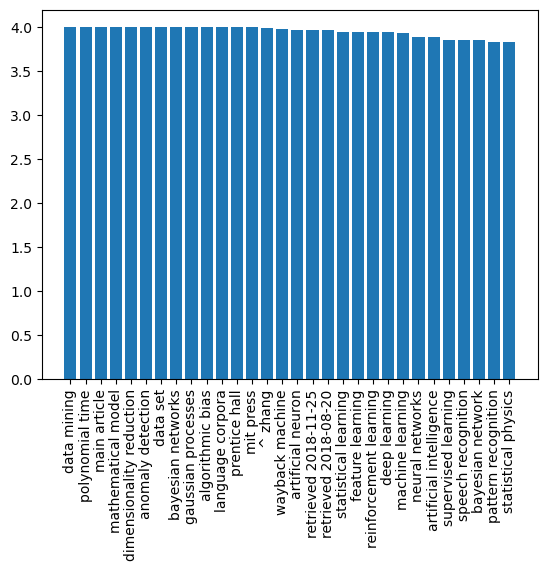

In [11]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)), k, rotation='vertical')
    plt.show()

plot(res[:30])